In [1]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, roc_auc_score


In [2]:
# loading logistic regression model & test data
lr_model = joblib.load("../models & test data/logistic-regression/logistic-regression-model.pkl")
X_test_lr = joblib.load("../models & test data/logistic-regression/logistic-regression-X_test.pkl")
y_test_lr = joblib.load("../models & test data/logistic-regression/logistic-regression-y_test.pkl")

In [3]:
# loading random forest model & test data
rf_model = joblib.load("../models & test data/random-forest/random-forest-model.pkl")
X_test_rf = joblib.load("../models & test data/random-forest/random-forest-X_test.pkl")
y_test_rf = joblib.load("../models & test data/random-forest/random-forest-y_test.pkl")

In [4]:
# loading svm model & test data
svm_model = joblib.load("../models & test data/svm/svm-model.pkl")
X_test_svm = joblib.load("../models & test data/svm/svm-X_test.pkl")
y_test_svm = joblib.load("../models & test data/svm/svm-y_test.pkl")

In [5]:
# loading xgboost regression model & test data
xgb_model = joblib.load("../models & test data/xgboost/xgboost-model.pkl")
X_test_xgb = joblib.load("../models & test data/xgboost/xgboost-X_test.pkl")
y_test_xgb = joblib.load("../models & test data/xgboost/xgboost-y_test.pkl")

                 Model  Accuracy
3              XGBoost  0.899780
1        Random Forest  0.898678
2                  SVM  0.889868
0  Logistic Regression  0.883260


<Axes: title={'center': 'Model Accuracy Comparison'}, xlabel='Model'>

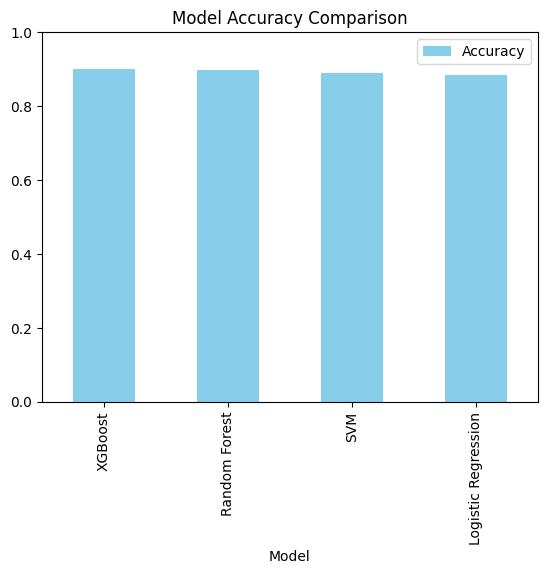

In [6]:
# Evaluate Models accuracy
models = {'Logistic Regression': lr_model, 'Random Forest': rf_model, 'SVM': svm_model, 'XGBoost': xgb_model}
test_sets = {'Logistic Regression': (X_test_lr, y_test_lr), 'Random Forest': (X_test_rf, y_test_rf), 
             'SVM': (X_test_svm, y_test_svm), 'XGBoost': (X_test_xgb, y_test_xgb)}

accuracy_results = {}
for name, model in models.items():
    X_t, y_t = test_sets[name]
    accuracy_results[name] = accuracy_score(y_t, model.predict(X_t))

# Display accuracy results
acc_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print(acc_df)

# Graphical representation of accuracy results
acc_df.plot(kind='bar', x='Model', y='Accuracy', title='Model Accuracy Comparison', color='skyblue', ylim=(0, 1))

                 Model  Precision    Recall  F1-Score
0  Logistic Regression   0.887347  0.866337  0.874333
1        Random Forest   0.903761  0.883030  0.891068
2                  SVM   0.898367  0.870754  0.880677
3              XGBoost   0.903962  0.884943  0.892453


<Axes: title={'center': 'Detailed Performance Metrics'}, xlabel='Model'>

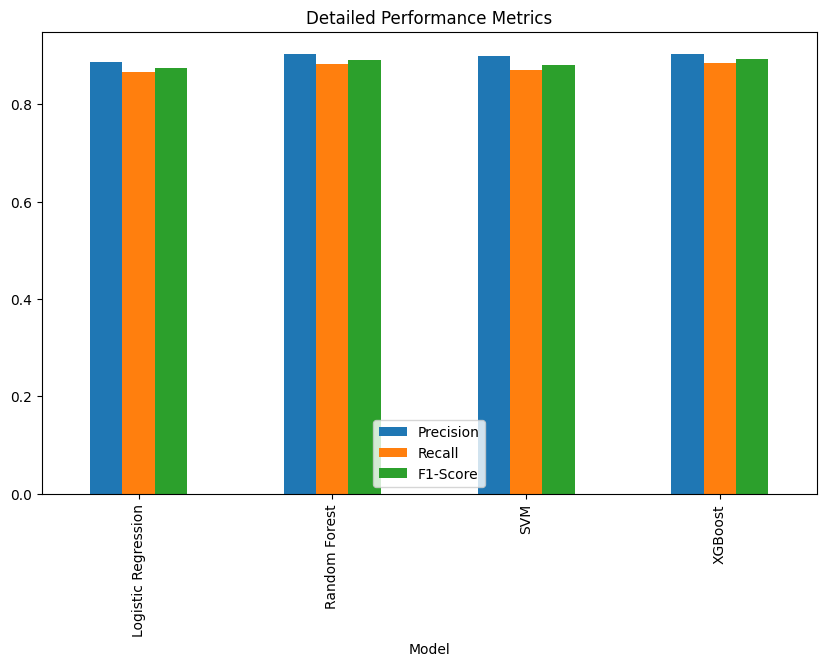

In [7]:
# Detailed Metrics Comparison
metrics_data = []

for name, model in models.items():
    X_t, y_t = test_sets[name]
    y_pred = model.predict(X_t)
    precision, recall, f1, _ = precision_recall_fscore_support(y_t, y_pred, average='macro')
    metrics_data.append([name, precision, recall, f1])

# DataFrame for detailed metrics
metrics_df = pd.DataFrame(metrics_data, columns=['Model', 'Precision', 'Recall', 'F1-Score'])
print(metrics_df)

# Multi-bar Chart for Detailed Metrics
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6), title='Detailed Performance Metrics')

                 Model   ROC-AUC
1        Random Forest  0.938746
3              XGBoost  0.938319
0  Logistic Regression  0.932562
2                  SVM  0.931793


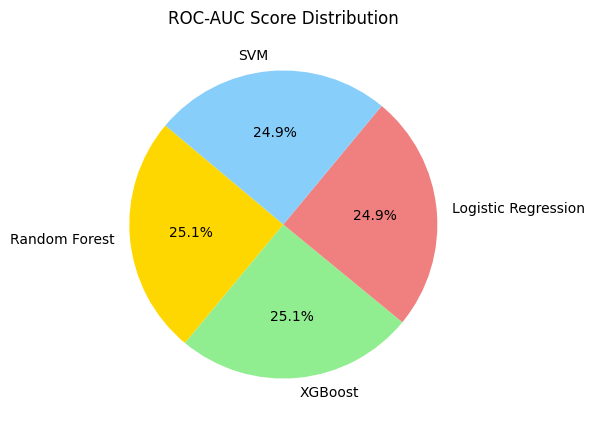

In [8]:
# ROC-AUC Comparison
auc_results = {}

for name, model in models.items():
    X_t, y_t = test_sets[name]
    if hasattr(model, "predict_proba"):
        auc_results[name] = roc_auc_score(y_t, model.predict_proba(X_t)[:, 1])
    else:
        auc_results[name] = roc_auc_score(y_t, model.decision_function(X_t))

auc_df = pd.DataFrame(list(auc_results.items()), columns=['Model', 'ROC-AUC']).sort_values(by='ROC-AUC', ascending=False)
print(auc_df)

# Display Comparison Chart
plt.figure(figsize=(8,5))
plt.pie(auc_df['ROC-AUC'], labels=auc_df['Model'], autopct='%1.1f%%', startangle=140, colors=['gold', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('ROC-AUC Score Distribution')
plt.show()

In [9]:
best_model_name = acc_df.iloc[0]['Model']
print(f"According to the tests, The Best Model is '{best_model_name}'.")

According to the tests, The Best Model is 'XGBoost'.
